<a href="https://colab.research.google.com/github/nagamamo/international_finance/blob/main/4_1_portfolio_investment_statistics1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#[1]ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#[2]データの読み込み
import pandas as pd
from google.colab import files
uploaded = files.upload()
ifs = pd.read_csv(('IMF_IFS2023Aug.csv'),encoding="Shift-JIS",index_col=0)

Saving IMF_IFS2023Aug.csv to IMF_IFS2023Aug.csv


<ipython-input-2-25bcc5373255>:5: DtypeWarning: Columns (36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,58,60,62,63,64,67,68,70,71,72,73,74,76,78,83,91,97,101,102,103,104,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  ifs = pd.read_csv(('IMF_IFS2023Aug.csv'),encoding="Shift-JIS",index_col=0)


In [ ]:
#[3]データの確認
ifs.head()

In [4]:
#[4]国・地域データの抽出
country=pd.DataFrame(ifs[(ifs["Country Code"] == 926)])
country.reset_index(inplace=True)
country.drop(country.columns[[0,1,2]],axis=1, inplace=True)
country=country.T
country.columns = country.iloc[0]
country = country.drop(country.index[0])
country.head()

Indicator Code,HSA_USD,FASDSO_XDC,FASDSO_XDC,FASAF_XDC,FASAF_XDC,IAO_BP6_USD,IAO_BP6_USD,IAOD_BP6_USD,IAOD_BP6_USD,FFCC_XDC,...,BCG_GEI_G01_CA_XDC,FDSAF_USD,EECUNE_XEU_XDC_RATE,EECUNE_XEU_XDC_RATE,ENECUE_XDC_XEU_RATE,ENECUE_XDC_XEU_RATE,BCG_GADLSDR_T_G01_CA_XDC,BCG_GADL_T_G01_CA_XDC,FDSLF_USD,FDSF_USD
Attribute,Value,Value,Status,Value,Status,Value,Status,Value,Status,Value,...,Value,Value,Value,Status,Value,Status,Value,Value,Value,Value
1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
country2=country[['ILPD_BP6_USD','NGDP_XDC','ENDA_XDC_USD_RATE']]
country2.columns=['ILPD_BP6_USD1','ILPD_BP6_USD2','NGDP_XDC','ENDA_XDC_USD_RATE1','ENDA_XDC_USD_RATE2']
country3=country2.drop(columns=country2.columns[1])
country4=country3.drop(columns=country3.columns[3])
country5=country4.dropna()
country6=country5.drop('Attribute')
country6

In [ ]:
country6['ILPD_BP6_USD1'] =country6['ILPD_BP6_USD1'].astype('float')
country6['NGDP_XDC'] =country6['NGDP_XDC'].astype('float')
country6['ENDA_XDC_USD_RATE'] =country6['ENDA_XDC_USD_RATE1'].astype('float')
country6['bond']=country6['ILPD_BP6_USD1']/((country6['NGDP_XDC'])/(country6['ENDA_XDC_USD_RATE']))
country6.describe()

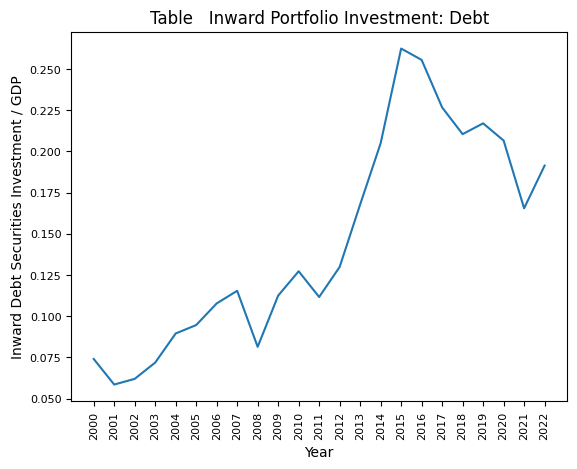

In [7]:
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Inward Debt Securities Investment / GDP")
plt.tick_params(labelsize=8)
plt.title('Table   Inward Portfolio Investment: Debt')
plt.plot(country6['bond'])